# Camera Claibration Testbed

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
from calibration import calculate_mtx_dist
%matplotlib inline

nx = 9
ny = 6

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

mtx_dist_save_file = 'dist_pickle.p'

# Calculate calibration matrix
mtx, dist = calculate_mtx_dist(images, nx=9, ny=6, verbose=True)


# Save Distortion matrix and coefficient
with open(mtx_dist_save_file, 'wb') as f:
    saved_obj = {"mtx": mtx, "dist" : dist}
    pickle.dump(saved_obj, f)

    


100%|██████████| 20/20 [00:06<00:00,  2.92it/s]


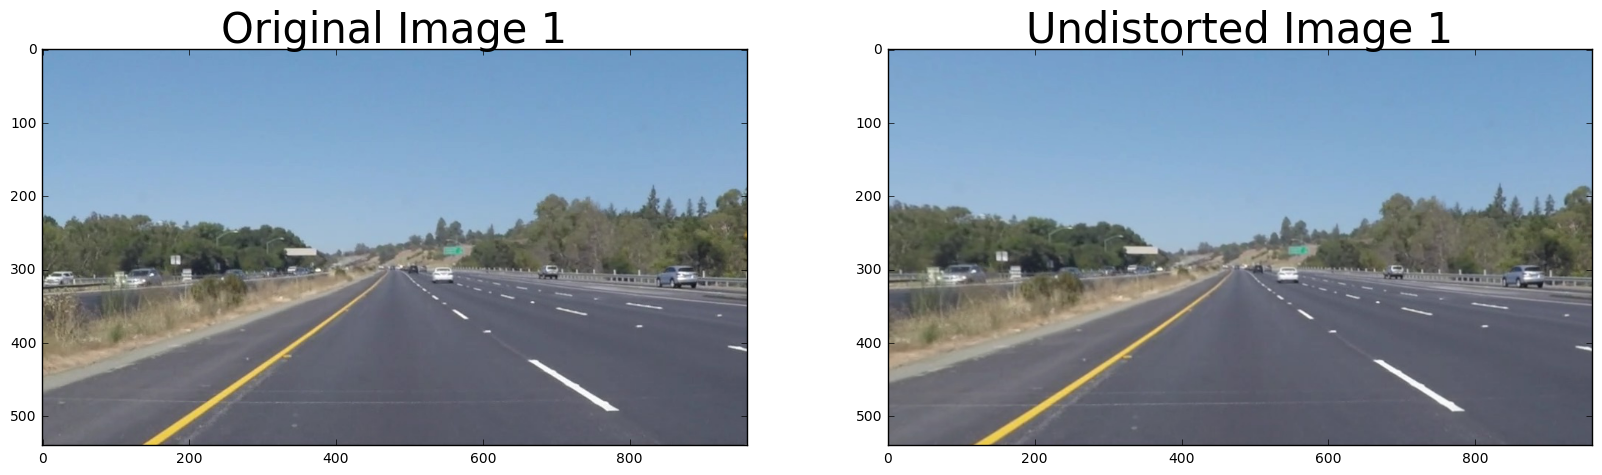

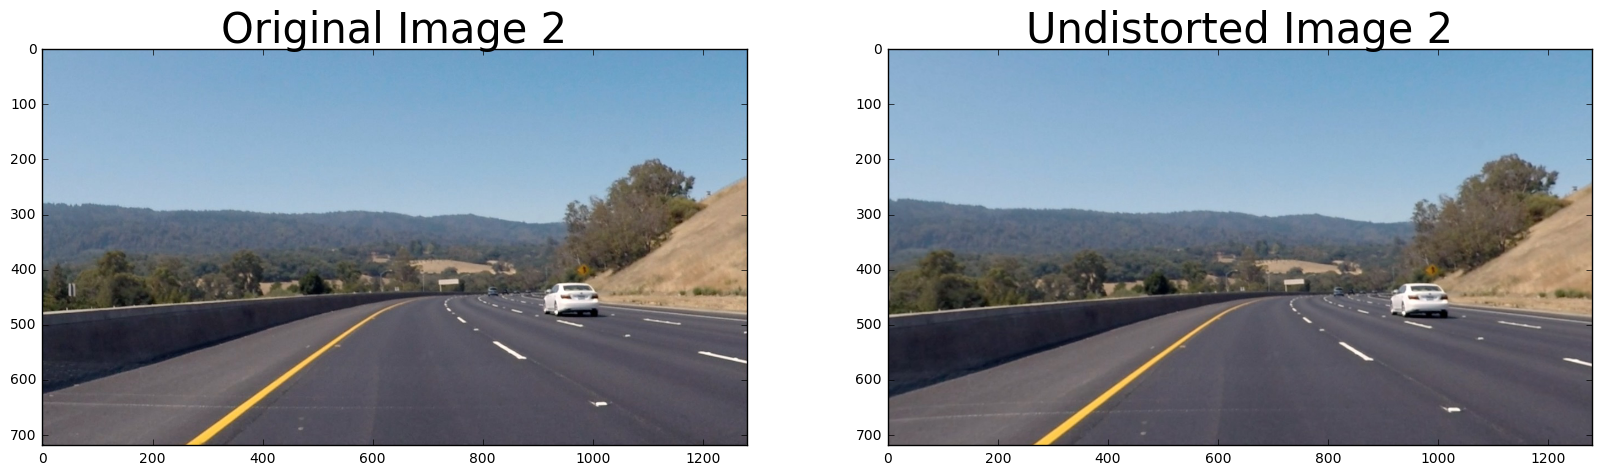

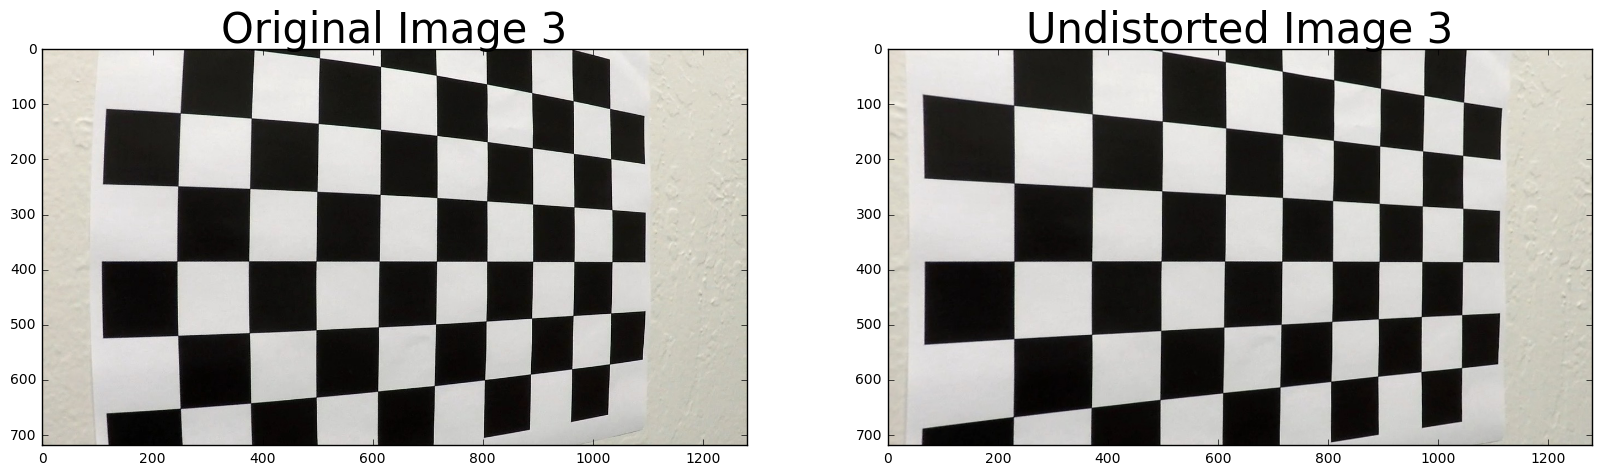

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


# Load Saved Camera Matrix and Distortion Coefficients
dist_pickle = pickle.load(open(mtx_dist_save_file, "rb" ))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]


# ======= Test 1
img = cv2.imread('test_images/solidYellowLeft.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/test_undist1.jpg', cv2.cvtColor(dst, cv2.COLOR_RGB2BGR))


# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image 1', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image 1', fontsize=30)

plt.savefig('output_images/test_undist1_comp.jpg')


# ======= Test 2
img = cv2.imread('test_images/test3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/test_undist2.jpg', cv2.cvtColor(dst, cv2.COLOR_RGB2BGR))

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image 2', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image 2', fontsize=30)

plt.savefig('output_images/test_undist2_comp.jpg')


# ======= Test 3
img = cv2.imread('camera_cal/calibration5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/test_undist3.jpg', cv2.cvtColor(dst, cv2.COLOR_RGB2BGR))

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image 3', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image 3', fontsize=30)

plt.savefig('output_images/test_undist3_comp.jpg')


